In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [17]:
df = pd.read_csv(r"C:\Users\Nikhil Pathak\OneDrive\Desktop\Python coding\Machine Learning\Linear Regression\placement.csv")
df.sample(5)

,cgpa,package
46,6.07,2.26
8,6.09,2.31
105,6.66,2.82
23,6.19,2.48
61,5.48,1.61


In [18]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

C:\Users\Nikhil Pathak\AppData\Local\Temp\ipykernel_2084\1105582992.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"],ax= axs0)
C:\Users\Nikhil Pathak\AppData\Local\Temp\ipykernel_2084\1105582992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["package"],ax= axs1)


<Axes: xlabel='package', ylabel='Density'>

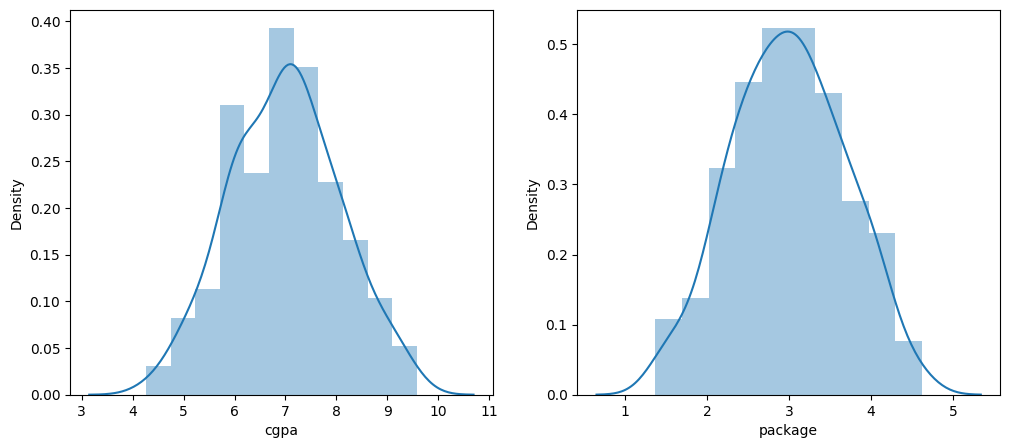

In [19]:
fig,(axs0,axs1) = plt.subplots(ncols=2,figsize=(12,5))
sns.distplot(df["cgpa"],ax= axs0)
sns.distplot(df["package"],ax= axs1)

In [20]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred1 = lr.predict(x_test)

In [56]:
r2_score(y_test,y_pred1)

0.7730984312051673

# Applying Data Augmentation 

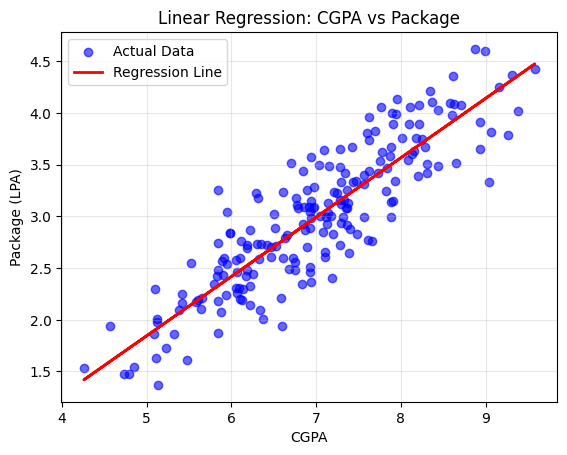

In [27]:
# plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.6, color='blue', label='Actual Data')
plt.plot(x,lr.predict(x), color='red', linewidth=2, label='Regression Line')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Linear Regression: CGPA vs Package')
plt.legend()
plt.grid(True, alpha=0.3)

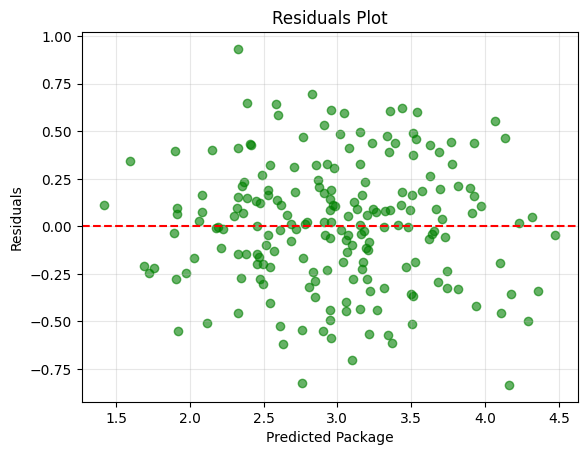

In [29]:
residuals = y - lr.predict(x)
plt.scatter(lr.predict(x), residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Package')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

In [30]:
augmented_df = df.copy()
    
# Method 1: Add Gaussian noise to existing data
np.random.seed(42)
noise_factor = 0.1  # 10% noise

noisy_data = df.copy()
noisy_data['cgpa'] += np.random.normal(0, noise_factor * noisy_data['cgpa'].std(), len(noisy_data))
noisy_data['package'] += np.random.normal(0, noise_factor * noisy_data['package'].std(), len(noisy_data))

# Method 2: Generate synthetic data based on the learned relationship
n_synthetic = 150
synthetic_cgpa = np.random.uniform(4.0, 10.0, n_synthetic)
synthetic_package = (lr.coef_[0] * synthetic_cgpa + 
                lr.intercept_ + 
                np.random.normal(0, 0.3, n_synthetic))  # Add some noise

synthetic_data = pd.DataFrame({
'cgpa': synthetic_cgpa,
'package': synthetic_package
})

In [33]:
augmented_df = pd.concat([df, noisy_data, synthetic_data],ignore_index=True)

In [38]:
x_aug = augmented_df[['cgpa']].values
x_aug.shape

(550, 1)

In [40]:
y_aug = augmented_df['package'].values
y_aug.shape

(550,)

In [41]:
x_train_aug, x_test_aug, y_train_aug, y_test_aug = train_test_split(x_aug, y_aug, test_size=0.2, random_state=42)

In [43]:
aug_model = LinearRegression()
aug_model.fit(x_train_aug, y_train_aug)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_pred_train_aug = aug_model.predict(x_train_aug)
y_pred_test_aug = aug_model.predict(x_test_aug)
y_pred_all_aug = aug_model.predict(x_aug)

In [48]:
r2_score(y_test_aug,y_pred_test_aug)

0.8484196175360366

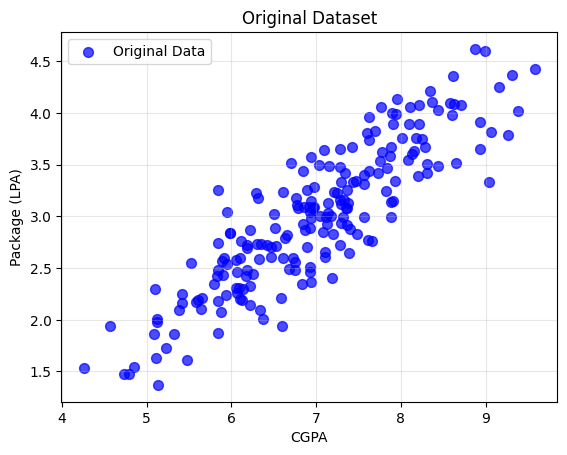

In [51]:
plt.scatter(df['cgpa'], df['package'], alpha=0.7, color='blue', label='Original Data', s=50)
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Original Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

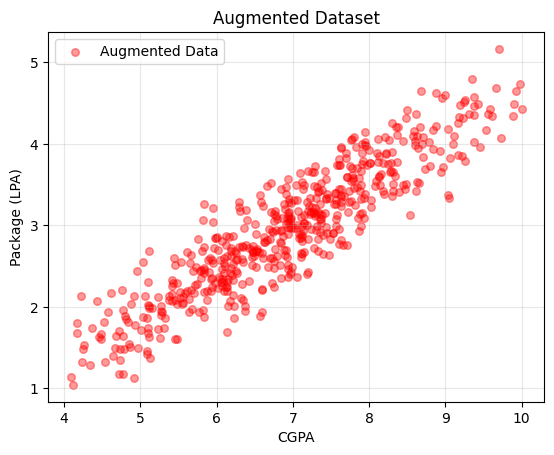

In [53]:
plt.scatter(augmented_df['cgpa'], augmented_df['package'], alpha=0.4,color='red', label='Augmented Data', s=30)
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Augmented Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

c:\Users\Nikhil Pathak\OneDrive\Desktop\Python coding\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


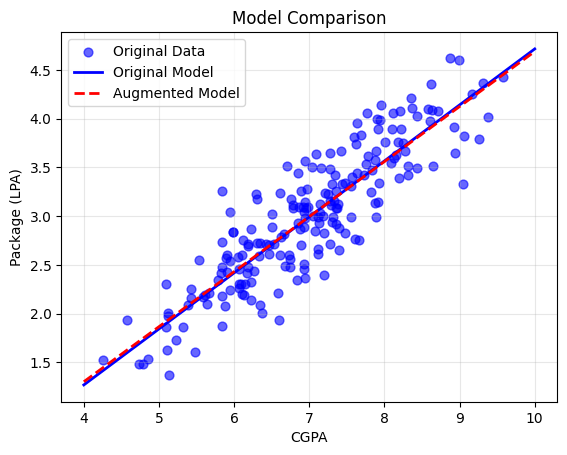

In [55]:
x_range = np.linspace(4, 10, 100).reshape(-1, 1)
y_orig = lr.predict(x_range)
y_aug = aug_model.predict(x_range)

plt.scatter(df['cgpa'], df['package'], alpha=0.6,color='blue', label='Original Data', s=40)
plt.plot(x_range, y_orig, color='blue', linewidth=2, label='Original Model')
plt.plot(x_range, y_aug, color='red', linewidth=2, linestyle='--', label='Augmented Model')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)